In [24]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer #converts to numerical counts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import pearsonr
import journalSentimentAnalysis as jsa

#need to edit to make names correct
df_combined = pd.read_csv('webscraped_data_draft.csv') #edit once have full data
df_news = pd.read_csv('news_data.csv')
#df_magazines = pd.read_csv('magazine_data.csv')
df_journals = pd.read_csv('journal_data.csv')

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Sentiment Analysis Using nltk

## Analysis of each source type separately

###News

In [18]:
analyzed_news = jsa.text_sentimentAnalysis(df_news, 'headline')
analyzed_news.head()


,headline,byline,keyword,Source,Source Type,sent_scores,sent_comp,sent_pos,sent_neg,sent_neu,sent_type
0,As Generation Z and millennials incorporate su...,Gen Z and millennials embrace sustainable alte...,sustainability,AP News,News,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.6249,0.217,0.0,0.783,pos
1,Premier League teams have agreed to introduce ...,Premier League to introduce a spending cap fro...,sustainability,AP News,News,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.4404,0.218,0.0,0.782,pos
2,Several NFL stadiums in the U.S. are among the...,"From composting to solar panels, NFL stadiums ...",sustainability,AP News,News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000,neu
3,There’s clearly an appetite for shopping susta...,How to make climate-friendly and sustainable c...,sustainability,AP News,News,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",0.2144,0.064,0.0,0.936,pos
4,A World Trade Organization agreement aimed at ...,Long-wrought WTO agreement aimed at reducing o...,sustainability,AP News,News,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.7003,0.158,0.0,0.842,pos


In [19]:
keyAnalyzed_news = jsa.key_sentimentAnalysis(analyzed_news, 'headline', 'keyword')
keyAnalyzed_news.head()

,keyword,sent_comp_count,sent_comp_std,sent_comp_mean,sent_pos_mean,sent_neg_mean,typeCount_summ
3,clean energy,76,0.351,0.338,0.245,0.038,"{'pos': 48, 'neu': 20, 'neg': 8}"
2,clean,76,0.379,0.275,0.235,0.069,"{'pos': 52, 'neg': 13, 'neu': 11}"
10,energy,75,0.329,0.194,0.233,0.084,"{'pos': 51, 'neg': 18, 'neu': 6}"
21,renewable,76,0.287,0.189,0.155,0.037,"{'pos': 43, 'neu': 25, 'neg': 8}"
22,renewable energy,76,0.299,0.172,0.162,0.052,"{'pos': 42, 'neu': 22, 'neg': 12}"


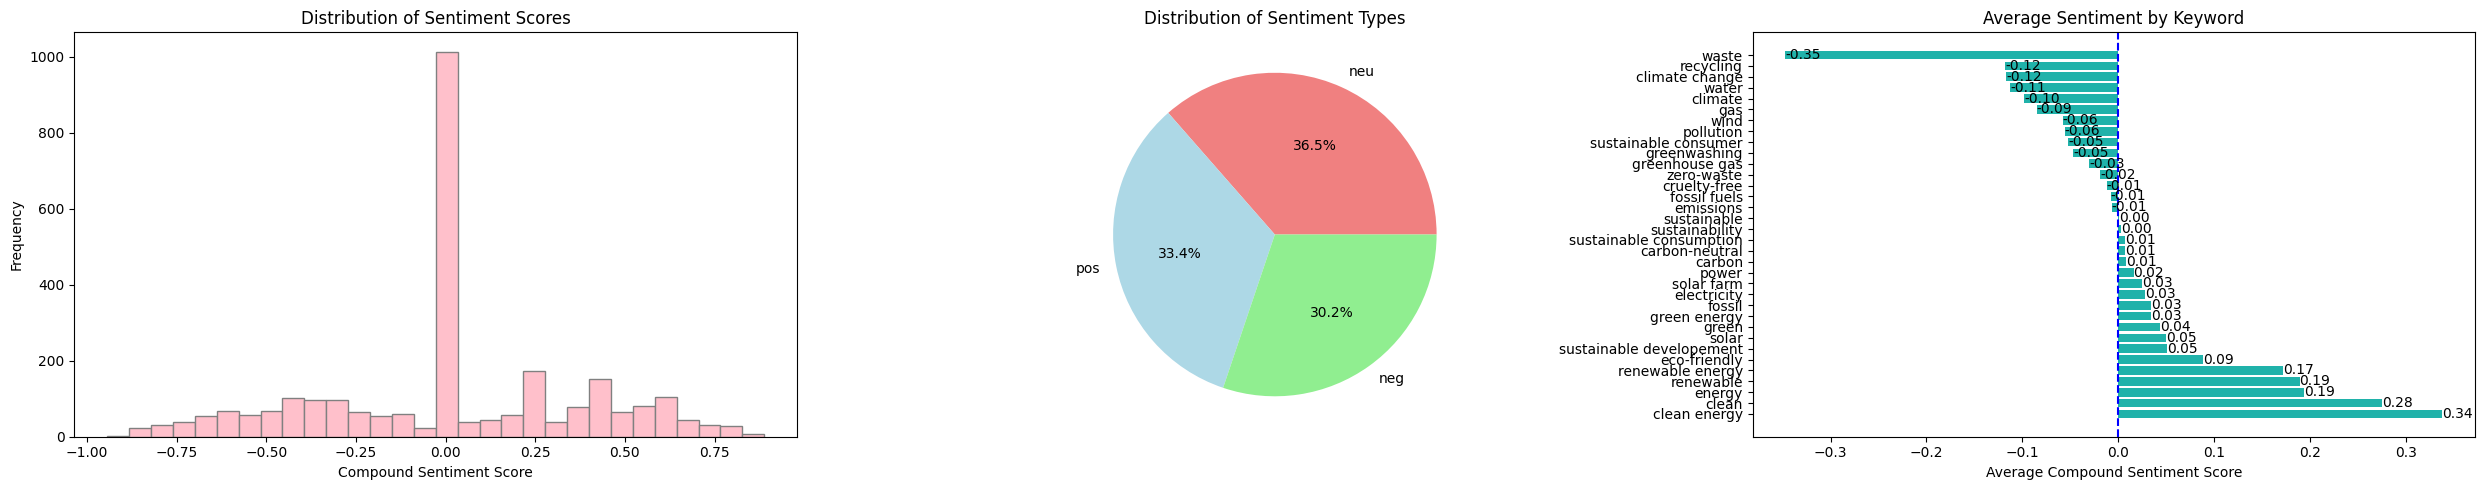

In [21]:
news_graphs = jsa.sent_result_graphs(analyzed_news, keyAnalyzed_news)

###Journals

In [25]:
analyzed_journals = jsa.text_sentimentAnalysis(df_journals, 'text')
analyzed_journals.head()

,Journal Name,keyword,text,Source Type,sent_scores,sent_comp,sent_pos,sent_neg,sent_neu,sent_type
0,Does the intensity of use of social media infl...,sustainability,Does the intensity of use of social media infl...,Journal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neu
1,Does the intensity of use of social media infl...,sustainability,Abstract In the last decades the term sustaina...,Journal,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.3612,0.091,0.000,0.909,pos
2,Does the intensity of use of social media infl...,sustainable,ments and companies. Its correct implementatio...,Journal,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.6249,0.137,0.000,0.863,pos
3,Does the intensity of use of social media infl...,sustainable,social media. The intensity of social media us...,Journal,"{'neg': 0.077, 'neu': 0.849, 'pos': 0.075, 'co...",-0.0258,0.075,0.077,0.849,neu
4,Does the intensity of use of social media infl...,sustainability,study analyses the intensity of social media u...,Journal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neu


In [26]:
keyAnalyzed_journals = jsa.key_sentimentAnalysis(analyzed_journals, 'text', 'keyword')
keyAnalyzed_journals.head()

,keyword,sent_comp_count,sent_comp_std,sent_comp_mean,sent_pos_mean,sent_neg_mean,typeCount_summ
0,carbon,8,0.284,0.502,0.112,0.007,"{'pos': 7, 'neu': 1}"
13,power,26,0.388,0.388,0.113,0.016,"{'pos': 19, 'neu': 4, 'neg': 3}"
7,energy,32,0.317,0.386,0.148,0.031,"{'pos': 28, 'neg': 3, 'neu': 1}"
14,recycling,12,0.310,0.374,0.088,0.007,"{'pos': 9, 'neu': 2, 'neg': 1}"
16,renewable energy,4,0.288,0.365,0.169,0.070,{'pos': 4}


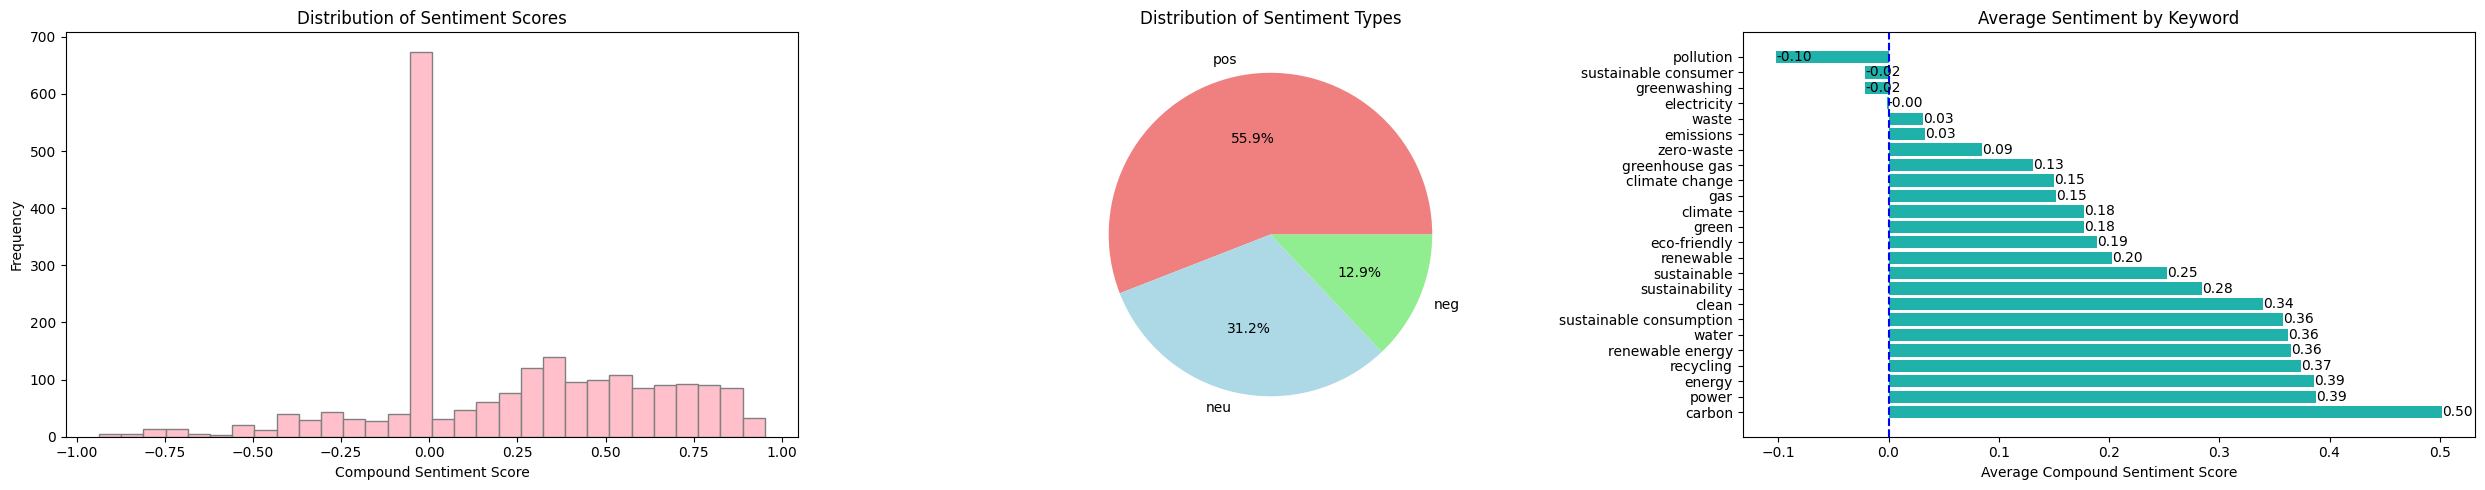

In [27]:
journal_graphs = jsa.sent_result_graphs(analyzed_journals, keyAnalyzed_journals)

###Magazines

In [ ]:
analyzed_magazines = jsa.text_sentimentAnalysis(df_magazines, 'headline')
analyzed_magazines.head()

In [ ]:
keyAnalyzed_magazines = jsa.key_sentimentAnalysis(analyzed_magazines, 'headline', 'keyword')
keyAnalyzed_magazines.head()

In [ ]:
magazine_graphs = jsa.sent_result_graphs(analyzed_magazines, keyAnalyzed_magazines)

## Analysis of all data together

In [31]:
sia = SentimentIntensityAnalyzer()

all_data_df_edited = df_combined.copy()
#allows us to calculate the scores and compound returns a normalized version of it
all_data_df_edited["sentiment_score"] = all_data_df_edited["headline"].apply(lambda x: sia.polarity_scores(x)["compound"])

#clean the text to help see frequencies in words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    return text

all_data_df_edited["cleaned_text"] = all_data_df_edited["headline"].apply(clean_text)
all_data_df_edited.head()

,Source,keyword,headline,Source Type,sentiment_score,cleaned_text
0,Does the intensity of use of social media infl...,sustainability,Does the intensity of use of social media infl...,Journal,0.0000,does the intensity of use of social media infl...
1,Does the intensity of use of social media infl...,sustainability,Abstract In the last decades the term sustaina...,Journal,0.3612,abstract in the last decades the term sustaina...
2,Does the intensity of use of social media infl...,sustainable,ments and companies. Its correct implementatio...,Journal,0.6249,ments and companies its correct implementation...
3,Does the intensity of use of social media infl...,sustainable,social media. The intensity of social media us...,Journal,-0.0258,social media the intensity of social media use...
4,Does the intensity of use of social media infl...,sustainability,study analyses the intensity of social media u...,Journal,0.0000,study analyses the intensity of social media u...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


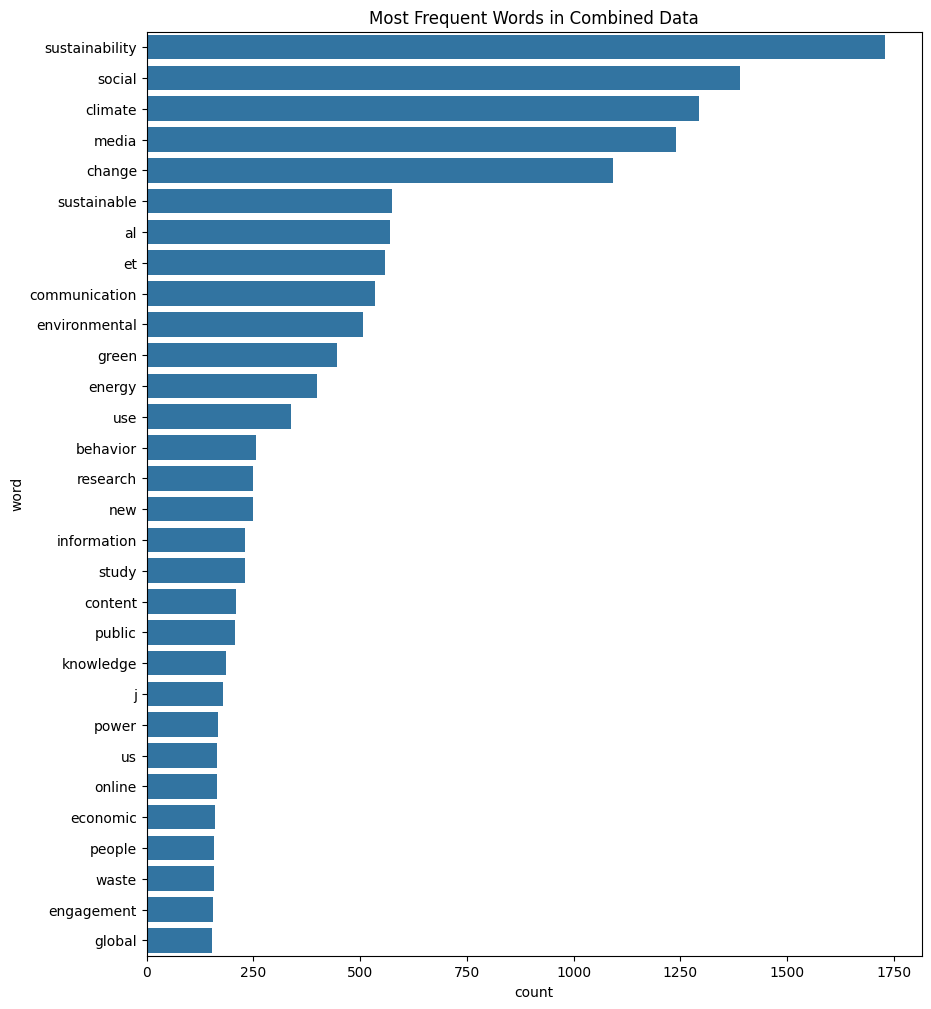

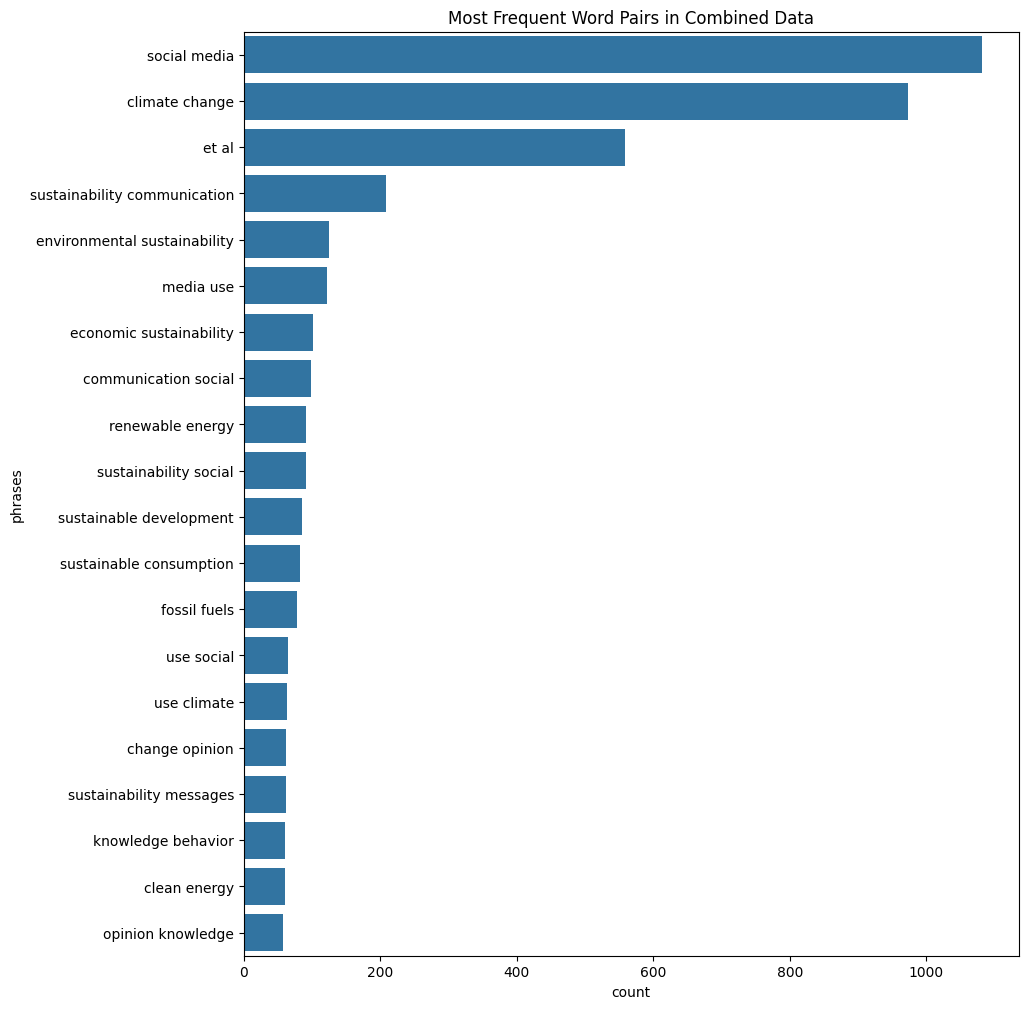

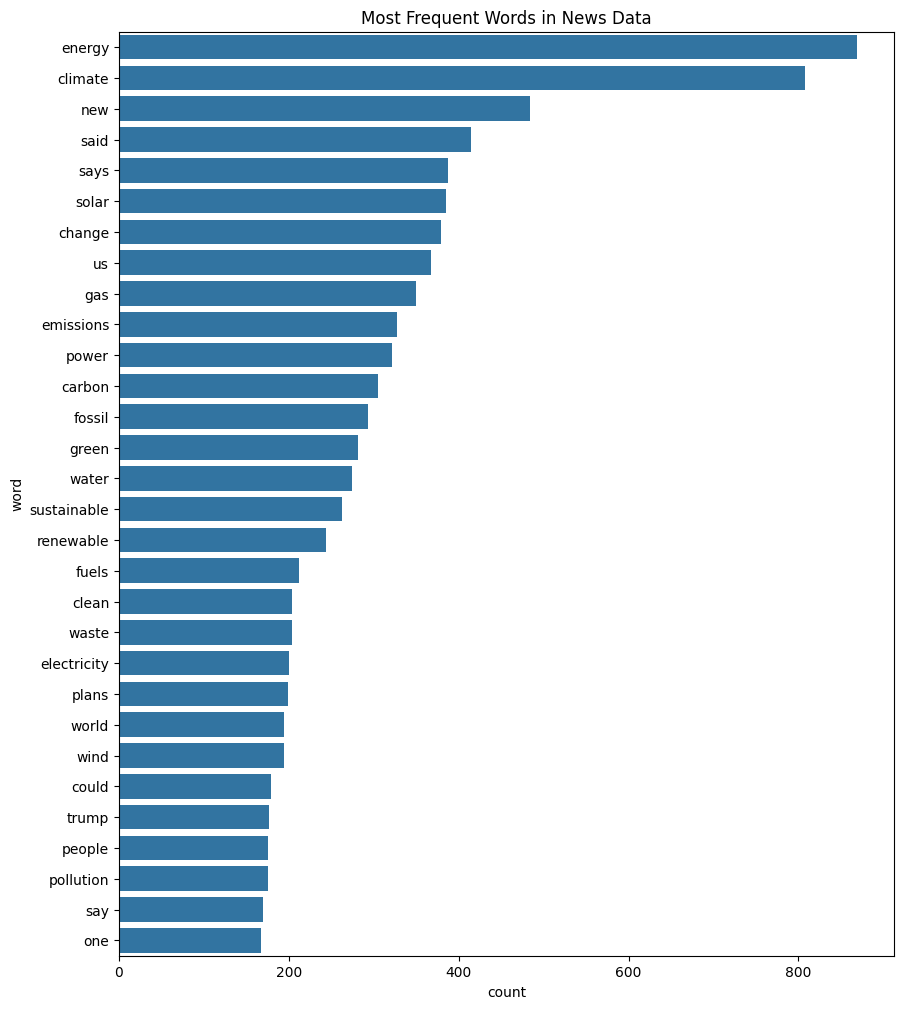

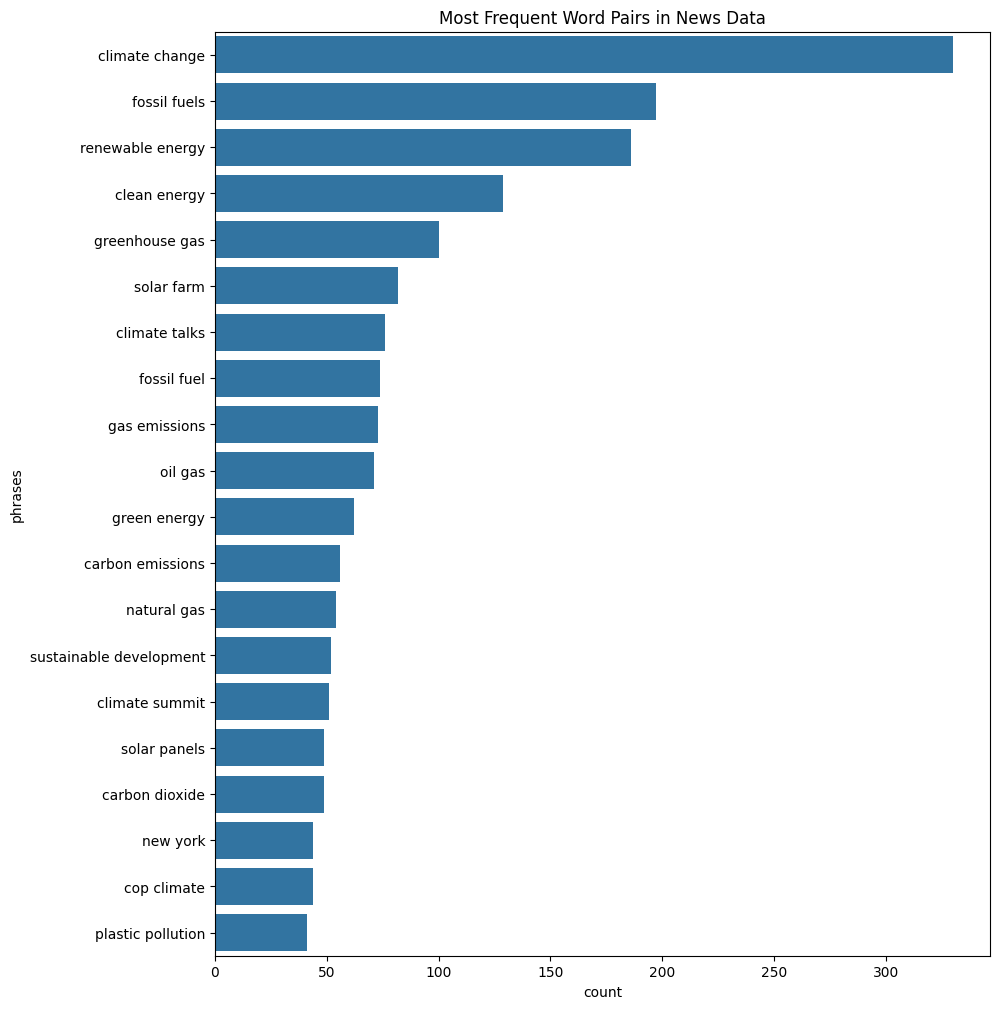

In [40]:
#see the frequencies in the words - FOR ALL OF OUR DATA COMBINED

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

all_words = " ".join(all_data_df_edited["cleaned_text"]).split()
filtered_words_nonstopwords = [word for word in all_words if word not in english_stopwords]
word_freq = Counter(filtered_words_nonstopwords)
common_words = word_freq.most_common(50)

#the word count of the most frequent terms
word_freq_df = pd.DataFrame(common_words, columns=["word", "count"])
plt.figure(figsize=(10, 12))
plot1 = sns.barplot(x="count", y="word", data=word_freq_df.head(30))
plot1.set_title('Most Frequent Words in Combined Data')
plt.show

#which pairs of words are popular
#phrases (two word ones)
phrases_two_words = CountVectorizer(ngram_range=(2,2), stop_words="english", max_features=60)
#learns the vocabulary of the phrases from cleaned_text col and transforms each into a numerical vector
X2 = phrases_two_words.fit_transform(all_data_df_edited["cleaned_text"])
#phrases, sums the counts: gives total frequency of each phrase
phrases = pd.DataFrame({"phrases": phrases_two_words.get_feature_names_out(),"count": X2.toarray().sum(axis=0) }).sort_values("count", ascending=False)
plt.figure(figsize=(10, 12))
plot2 = sns.barplot(x="count", y="phrases", data=phrases.head(20))
plot2.set_title('Most Frequent Word Pairs in Combined Data')
plt.show

#now looking at only news - specific instead of the general

#see the frequencies in the words - FOR JUST NEWS
df_news["combined_text"] = df_news["headline"].fillna('') + " " + df_news["byline"].fillna('')
df_news["cleaned_text"] = df_news["combined_text"].apply(clean_text)

all_words = " ".join(df_news["cleaned_text"]).split()
filtered_words_nonstopwords = [word for word in all_words if word not in english_stopwords]
word_freq = Counter(filtered_words_nonstopwords)
common_words = word_freq.most_common(50) #most_common returns the most common elements and their counts

word_freq_df = pd.DataFrame(common_words, columns=["word", "count"])
plt.figure(figsize=(10, 12))
plot3 = sns.barplot(x="count", y="word", data=word_freq_df.head(30))
plot3.set_title('Most Frequent Words in News Data')
plt.show()

#which pairs of words are popular

#phrases (two word ones)
phrases_two_words = CountVectorizer(ngram_range=(2,2), stop_words="english", max_features=60)
#learns the vocabulary of the phrases (or bigrams) from cleaned_text col and transforms each into a numerical vector
X2 = phrases_two_words.fit_transform(df_news["cleaned_text"])
#phrases, sums the counts: gives total frequency of each phrase
phrases = pd.DataFrame({"phrases": phrases_two_words.get_feature_names_out(),"count": X2.toarray().sum(axis=0) }).sort_values("count", ascending=False)
plt.figure(figsize=(10, 12))
plot4 = sns.barplot(x="count", y="phrases", data=phrases.head(20))
plot4.set_title('Most Frequent Word Pairs in News Data')
plt.show()

In [42]:
#update the sentiment scores based on sustainable contexts/terminologies

new_words = {
    "sustainability": 2.0,
    "sustainable": 2.0,
    "greenwashing": -2.5,
    "carbon-neutral": 1.5,
    "renewable": 1.8,
    "eco-friendly": 1.8,
    "pollution": -2.0,
    "emissions": -1.5,
    "recycling": 1.3,
    "green": 1.2,
    "cruelty-free": 1.5,
    "zero-waste": 1.5,
    "carbon": 1,
    "energy": 1,
    "climate": 1.5,
    "solar": 1.6,
    "power": 1.1,
    "water": 1.1,
    "wind": 1.3,
    "waste": -1.2,
    "gas": -1.3,
    "electricity": 1.2,
    "fossil": -2,
    "clean": 2,
    "renewable energy": 2,
    "climate change": 1.7,
    "fossil fuels": -1.7,
    "green energy": 2,
    "solar farm": 1.7,
    "greenhouse gas": -1.6,
    "clean energy": 1.4,
    "sustainable consumer": 1.5 ,
    "sustainable developement": 1.6,
    "sustainable consumption": 1.4
}

sia.lexicon.update(new_words)
#now scoring this with the updated values for having sustainable contexts
all_data_df_edited["sustainable_updated_sentiment"] = all_data_df_edited["headline"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [45]:
#now cluster it using KMeans to see the trends
#this can tell us what types of headlines are most commonly used

tfidf = TfidfVectorizer(stop_words="english") #assigns weights based on frequency
X = tfidf.fit_transform(all_data_df_edited["headline"]) #learning the data

kmeans = KMeans(n_clusters=20, random_state=42)
all_data_df_edited["cluster"] = kmeans.fit_predict(X) #give labels to the data

#looking into the common words per each cluster
#the words that the tfidfVectrozier has already pulled from the headlines/bylines
terms_to_look_through = np.array(tfidf.get_feature_names_out())

#what words are most commonly used in each cluster - can give an overview of what kinds of headlines are in each cluster
for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i]
    indicies_with_common_terms = center.argsort()[::-1] #returns indicies from high to low
    common_terms_per_cluster = terms_to_look_through[indicies_with_common_terms][:15]


#per cluster what is the average sentiment (whihc comes from the updated sentiment scores)
cluster_summary = (all_data_df_edited.groupby("cluster").agg(avg_sentiment=("sustainable_updated_sentiment", "mean"),count=("headline", "count")).reset_index())

#allows you to extract a subset of a dataframe as a dataframe itself frorm the larger dataframe
#so you can hone in on a few headlines to really analyze what is going on
def get_top_headlines(df, cluster_num, sentiment_col="sustainable_updated_sentiment", n=5):
    look_into_each_cluster = df[df["cluster"] == cluster_num]
    #nlargest: returns the first n rows of a DataFrame with the largest values in specified columns, ordered in descending order.
    top_pos = look_into_each_cluster.nlargest(n, sentiment_col)[["headline", sentiment_col]]
    return top_pos

#this allows to see what the top positive (and even negative) headlines are per cluster
cluster_summary["top_positive"] = cluster_summary["cluster"].apply(lambda clust: get_top_headlines(all_data_df_edited, clust))

In [47]:
#filtering the top cluster terms by sustainability related terms
words_to_filter_by = [
    "sustainable", "renewable", "eco", "green", "carbon",
    "emission", "energy", "recycle", "marketing", "innovation", "environment", "climate", "change", "emissions", "greenhouse", "farming", "solar", "farm",
    "recycled", "water", "light", "greener", "recycling", "waste", "food", "plastic", "gas", "natural", "clean", "power"]

filtered_clusters = {}

#go through each cluster
for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i]
    indicies_with_common_terms = center.argsort()[::-1] #returns indicies from high to low (basically get this most important terms per cluster)
    common_terms_per_cluster = terms_to_look_through[indicies_with_common_terms][:15] #retrieves the top 15 terms
    #now filter these cluster terms to the "sustainable" context
    filtered_terms = [term for term in common_terms_per_cluster if any(f in term for f in words_to_filter_by)]
    filtered_clusters[i] = filtered_terms #make that index (so cluster in this case) have those filtered terms

#dataframe with the avg mean per cluster and how many headlines per cluster
summary = (all_data_df_edited.groupby("cluster").agg(avg_sentiment=("sustainable_updated_sentiment", "mean"),count=("headline", "count")).reset_index())

#replaces each cluster number with the list of filtered sustainability terms per cluster - to see the top sustainable terms per cluster
summary["top_focus_terms_green_related"] = summary["cluster"].map(filtered_clusters)
summary.loc[1, "top_focus_terms_green_related"] = ["sustainable"] #to fix row
summary.loc[4, "top_focus_terms_green_related"] = ["recycling"] #to fix row
#count how many sustainable related terms are in each row (by checking if it is a list, then finding the length of it)
summary["focus_term_count"] = summary["top_focus_terms_green_related"].apply(lambda x: len(x) if isinstance(x, list) else 0)

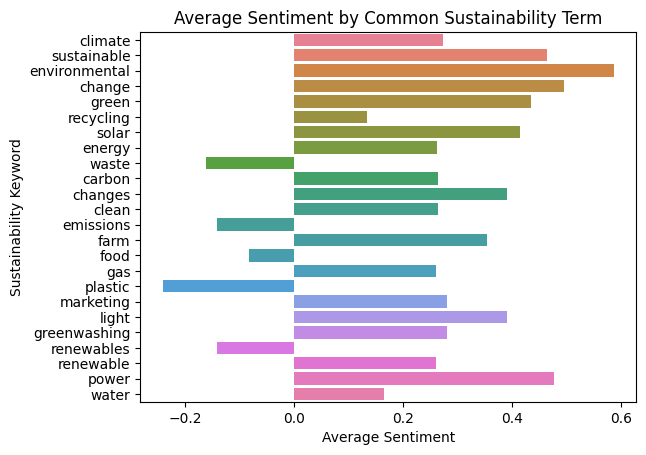

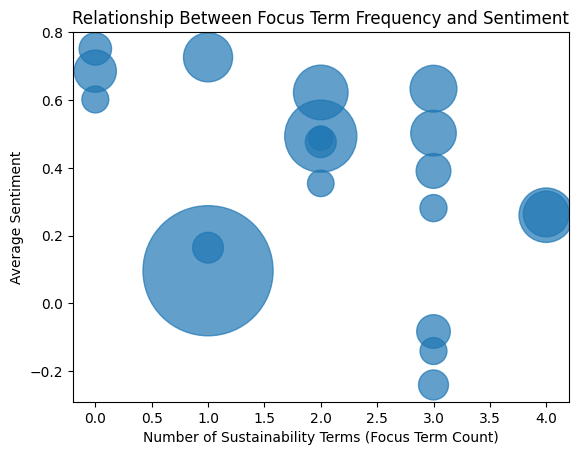

In [48]:
#visuals for above
#see how frequent those filter terms are
#explode: transform each element of a list to a row, replicating index value
  #makes it easier to go through and really see each one better (to spilt it up)
summary_exploded = summary.explode("top_focus_terms_green_related")
summary_exploded = summary_exploded.dropna()

focus_term_summary = (summary_exploded.groupby("top_focus_terms_green_related").agg(frequency=("cluster", "count"), avg_sentiment=("avg_sentiment", "mean")).sort_values("frequency", ascending=False))

#visualizing these terms and their avg sentiment
top_terms = focus_term_summary
sns.barplot(y=top_terms.index, x=top_terms["avg_sentiment"], hue = top_terms.index, legend=False)
plt.title("Average Sentiment by Common Sustainability Term")
plt.xlabel("Average Sentiment")
plt.ylabel("Sustainability Keyword")
plt.show()

#visualizing relationshop between amount of sustainability related terms and the sentiment and size is due to headline count
import matplotlib.pyplot as plt

plt.scatter(summary["focus_term_count"], summary["avg_sentiment"], s=summary["count"]*5, alpha=0.7)
plt.xlabel("Number of Sustainability Terms (Focus Term Count)")
plt.ylabel("Average Sentiment")
plt.title("Relationship Between Focus Term Frequency and Sentiment")
plt.show()

In [50]:
#exploring sentiment by categories
#explorining sentiment by keywords
sentiment_overview_by_keyword = (all_data_df_edited.groupby("keyword")["sustainable_updated_sentiment"].agg(["mean", "count"]).sort_values("mean", ascending=False))

#explorining sentiment by source type
sentiment_overview_source = (all_data_df_edited.groupby("Source Type")["sustainable_updated_sentiment"].agg(["mean", "median", "count"]))

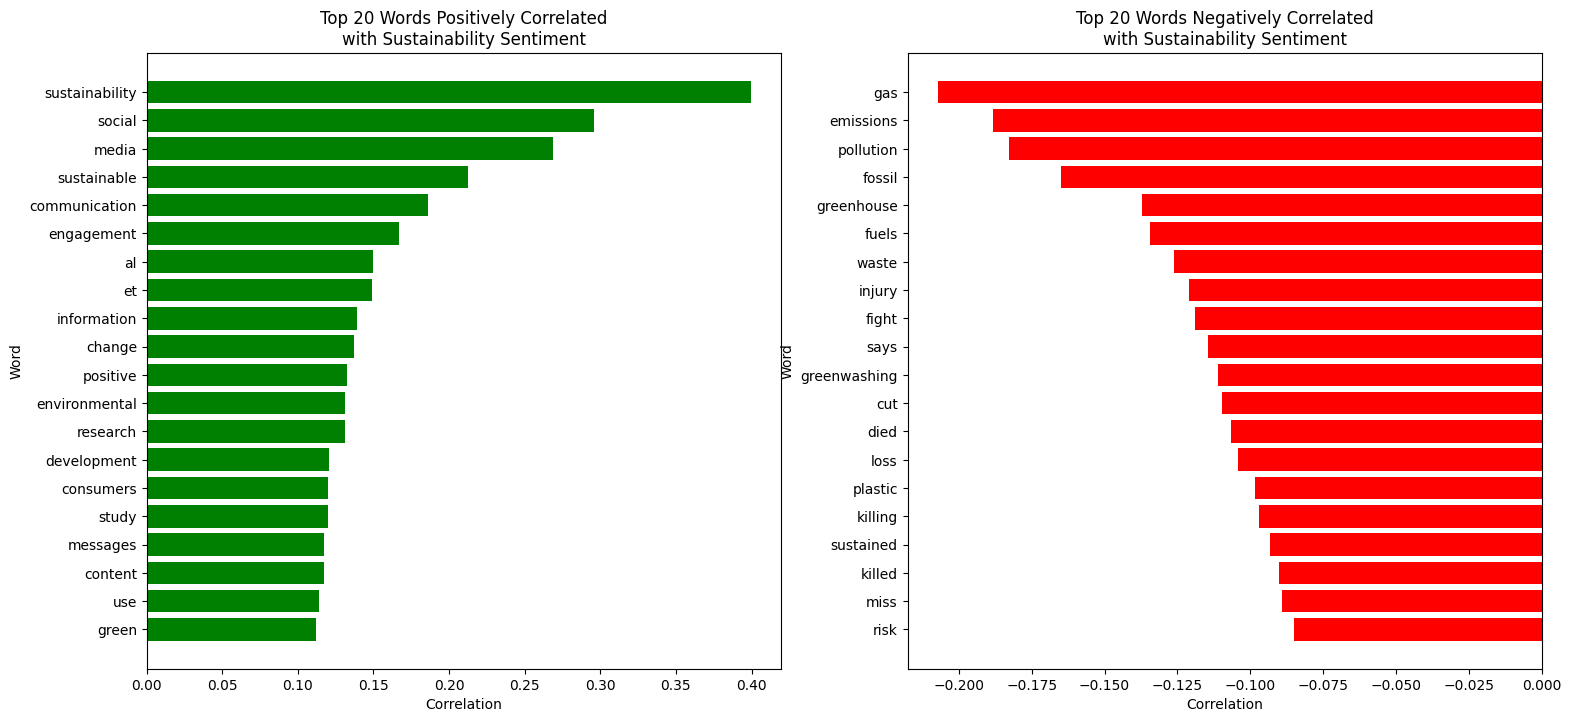

In [51]:
#most Positive vs most Negative Words (word + sentiment correlation)
tfidf = TfidfVectorizer(stop_words="english")
X = tfidf.fit_transform(all_data_df_edited["cleaned_text"])
terms = tfidf.get_feature_names_out() #the unique words that tfidf gets out from the cleaned_text column

word_corr = []

for i, term in enumerate(terms):
    word_weight = X[:, i].toarray().flatten() #give tfidf score of this specific word we are on across all headlines/cleaned text
    #pearsonr: measures the linear relationship between two datasets
    corr = pearsonr(word_weight, all_data_df_edited["sustainable_updated_sentiment"])[0] #pearson R: can get the correlation b/t word_weight and scores of the headlines the specific word is in (returns correlation coeff and p-val - that is why subset [0])
    word_corr.append((term, corr)) #now the word_corr can be more thorough to show for analysis

positive_words = sorted(word_corr, key=lambda x: x[1], reverse=True)[:20]  # positive words, reverse = True because the default is sort ascendingly
negative_words = sorted(word_corr, key=lambda x: x[1])[:20]  # negative words

#seeing them visually
#convert both to dataframe
df_pos = pd.DataFrame(positive_words, columns=["word", "correlation"])
df_neg = pd.DataFrame(negative_words, columns=["word", "correlation"])

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

#positive words
ax[0].barh(df_pos["word"][::-1], df_pos["correlation"][::-1], color="green") #to create horizontal bar plot
ax[0].set_title("Top 20 Words Positively Correlated\nwith Sustainability Sentiment")
ax[0].set_xlabel("Correlation")
ax[0].set_ylabel("Word")

# negative words
ax[1].barh(df_neg["word"][::-1], df_neg["correlation"][::-1], color="red")
ax[1].set_title("Top 20 Words Negatively Correlated\nwith Sustainability Sentiment")
ax[1].set_xlabel("Correlation")
ax[1].set_ylabel("Word")

plt.show()

# Verifying with TensorFlow

In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import string
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import losses
import tensorflow_sentiment_functions as sf

In [ ]:
#all of this tensor flow code is cited from the lecture
copied_edited_df = all_data_df_edited.copy()

#making the continous range of sentiments be grouped so that -1 to -0.05 = negative, -0.5 to 0.05 -s neutral, and 0.05 to 1 is positive
copied_edited_df["sentiment_label"] = pd.cut(
copied_edited_df["sustainable_updated_sentiment"], bins=[-1, -0.05, 0.05, 1], labels=["negative", "neutral", "positive"])

In [ ]:
#now label encode it

le = LabelEncoder()
copied_edited_df["sentiment_label"] = le.fit_transform(copied_edited_df["sentiment_label"])
copied_edited_df.head()

In [ ]:
#creating the tensor flow data set
data_tf = tf.data.Dataset.from_tensor_slices((copied_edited_df["cleaned_text"], copied_edited_df["sentiment_label"]))

# take the first 5 headlines and categories
for headline, category in data_tf.take(5):
    print(headline)
    print(category)
    print("")

In [ ]:
#performing a train-test split + taking out a small validation set.
data_tf = data_tf.shuffle(buffer_size=len(data_tf))

train_size = int(0.7*len(data_tf))
val_size   = int(0.1*len(data_tf))

train = data_tf.take(train_size)
val   = data_tf.skip(train_size).take(val_size)
test  = data_tf.skip(train_size+val_size)

In [ ]:
# only the top distinct words will be tracked
max_tokens = 2000

# each headline will be a vector of length 25
sequence_length = 25

vectorize_layer = TextVectorization(
    standardize=standardization,
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# select the headlines only from the (headline, category) tuples
headlines = train.map(lambda x, y: x)

vectorize_layer.adapt(headlines)

NameError: name 'train' is not defined

In [ ]:
train_vec = train.map(lambda x, y: vectorize_headline(x, y, vectorize_layer))
val_vec   = val.map(lambda x, y: vectorize_headline(x, y, vectorize_layer))
test_vec  = test.map(lambda x, y: vectorize_headline(x, y, vectorize_layer))

In [ ]:
for headline, category in data_tf.take(5):
    print(headline)
    print(standardization(headline))
    print(vectorize_layer(tf.expand_dims(headline, 0)))
    print("\n")

In [ ]:
vectorize_layer.get_vocabulary()

In [ ]:
#now onto modeling using a Sequential model
categories = copied_edited_df["sentiment_label"].unique().tolist()

model = tf.keras.Sequential([
  layers.Embedding(max_tokens, output_dim=3, name="embedding"),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(len(categories))]
)

In [ ]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# don't set batch size - this is handled by the Dataset object
history = model.fit(train_vec, epochs=55, validation_data=val_vec)

In [ ]:
#plotting the validation accuracy and accuracy
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

In [ ]:
#now evaluate on unseen data
model.evaluate(test_vec)